In [169]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
data = pd.read_excel("Inx Future.xls")

In [171]:
data.shape

(1200, 28)

In [172]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [173]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


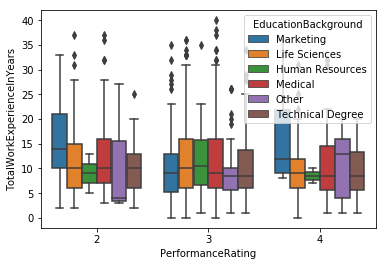

In [174]:
sns.boxplot(x = 'PerformanceRating',y = 'TotalWorkExperienceInYears',hue = 'EducationBackground',data = data)

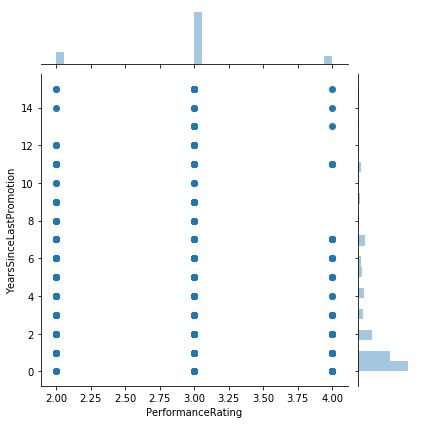

In [175]:
sns.jointplot(x = 'PerformanceRating',y = 'YearsSinceLastPromotion',data = data,kind = 'scatter')

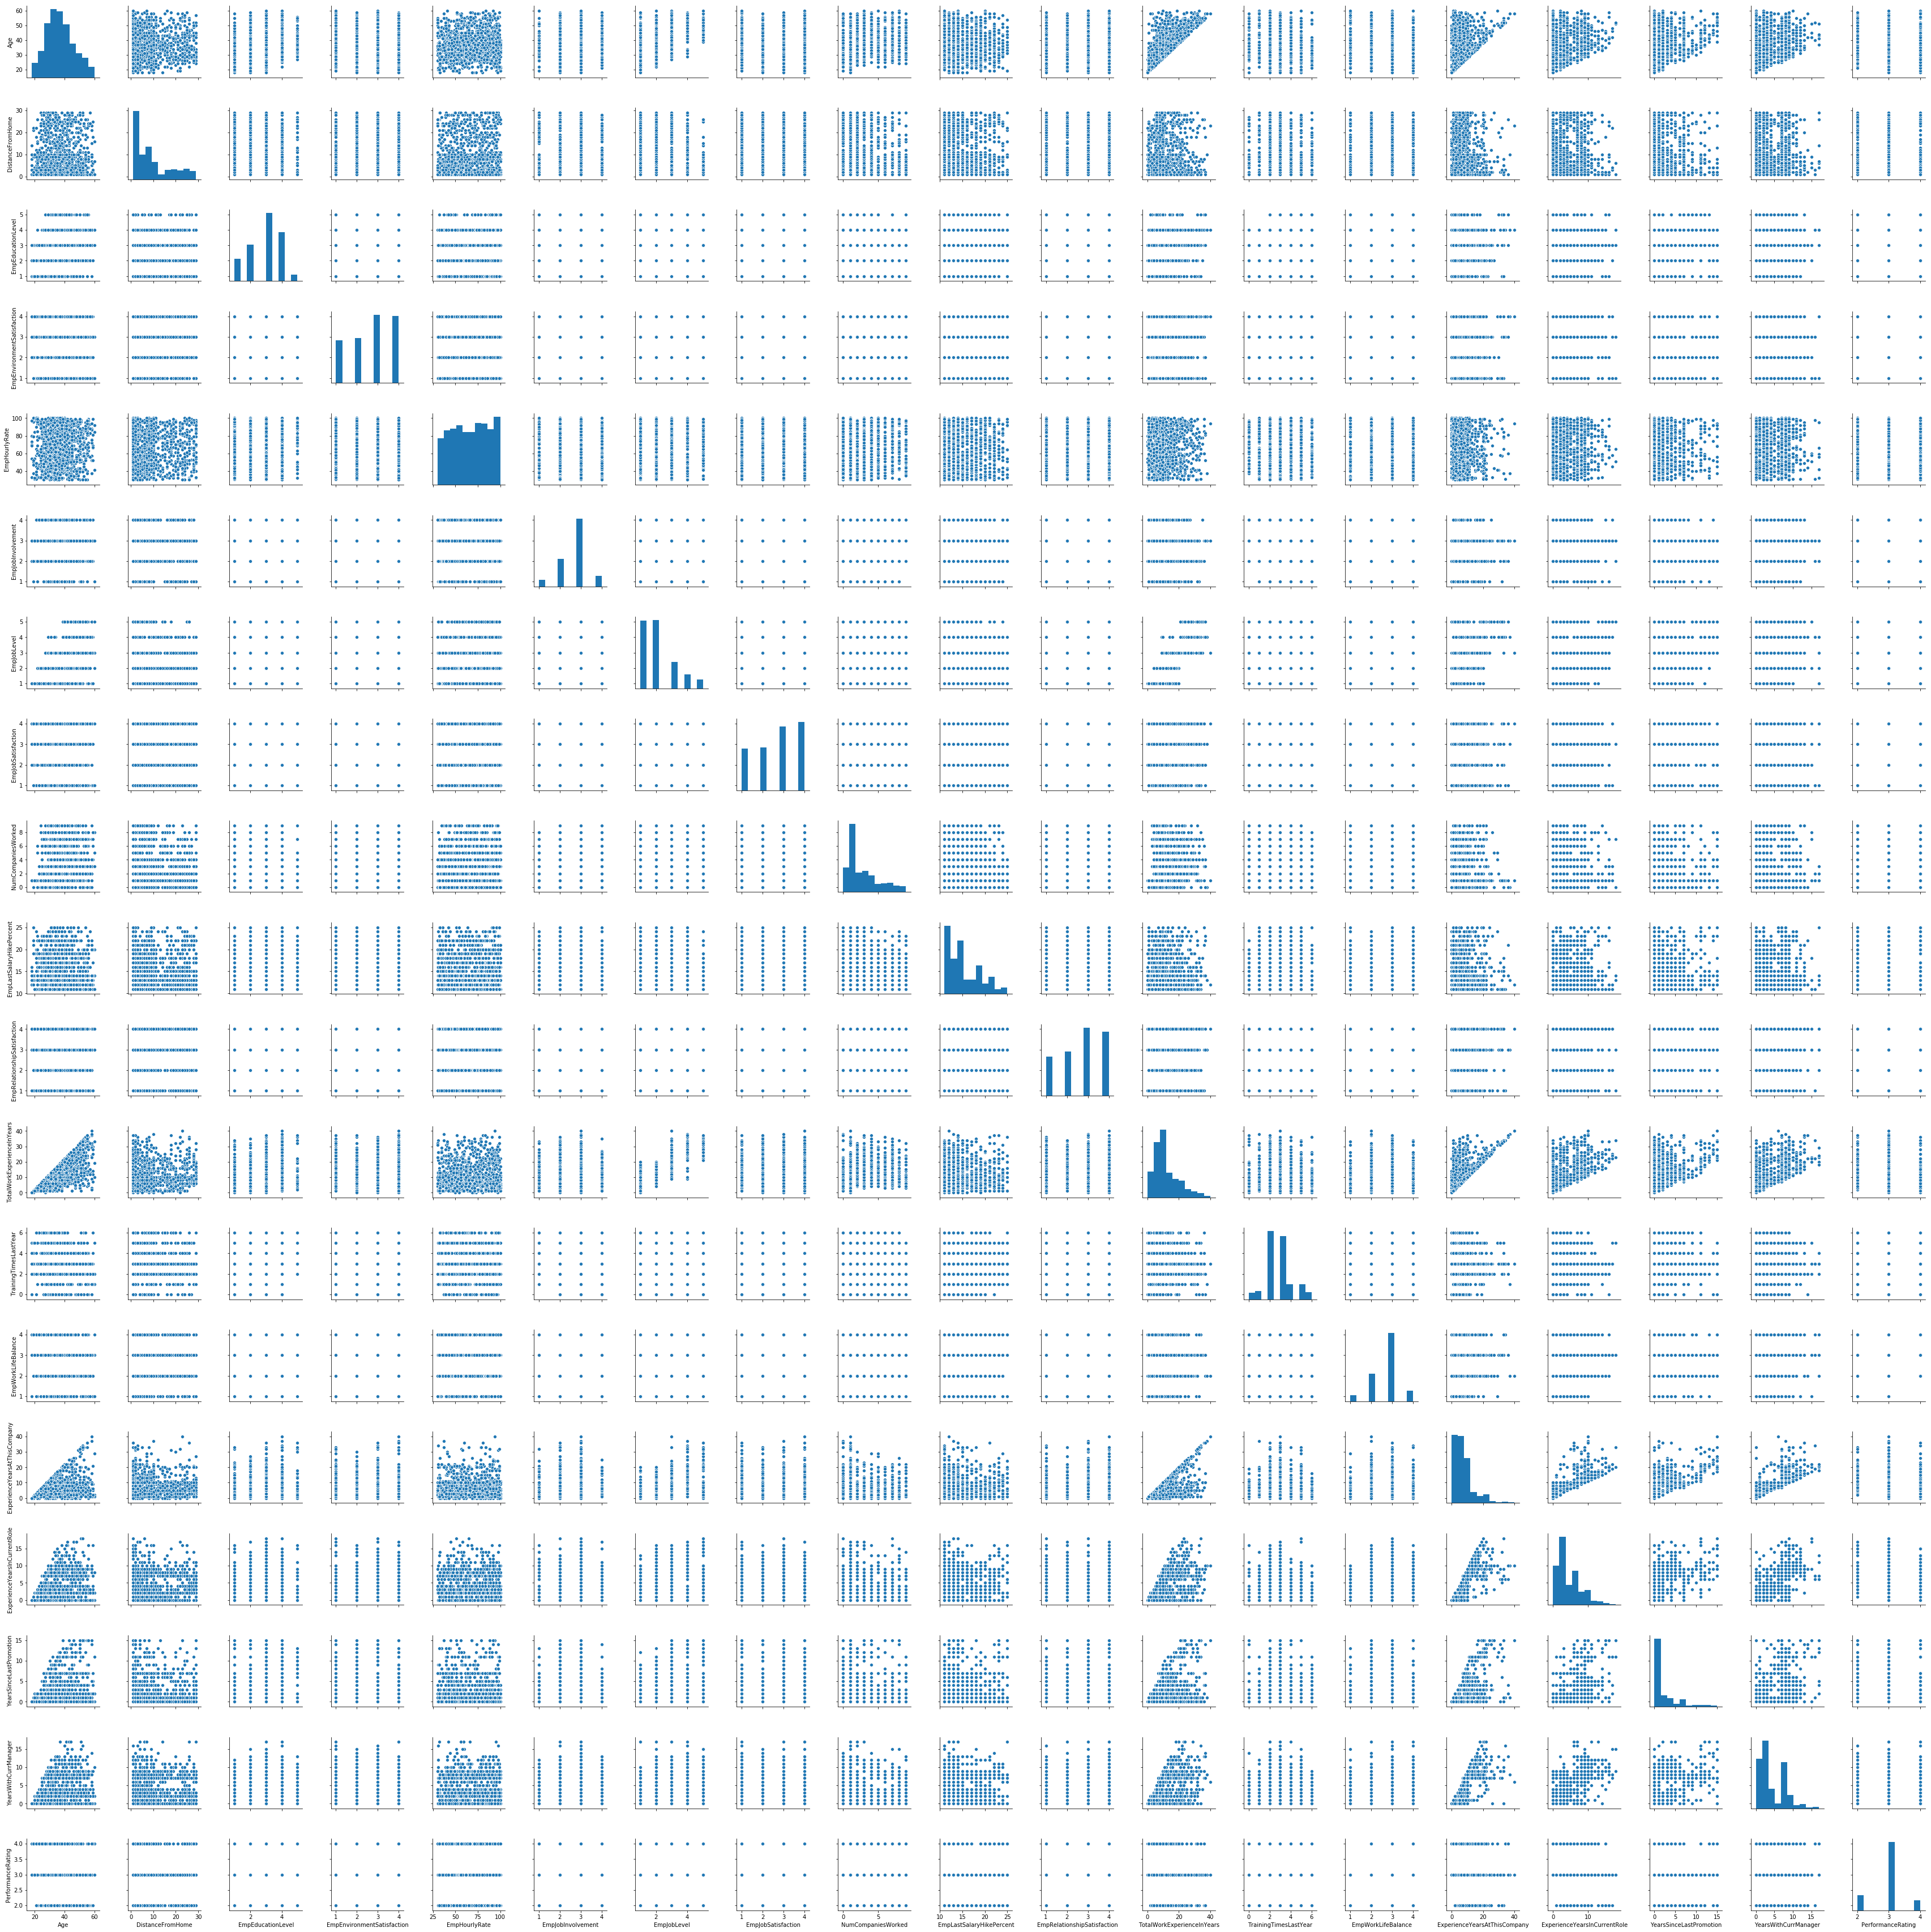

In [176]:
sns.pairplot(data)

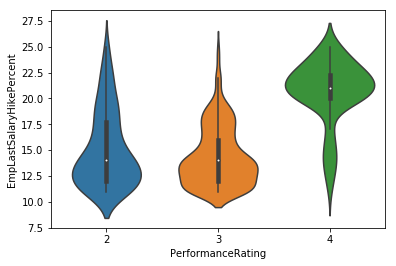

In [178]:
sns.violinplot(x = 'PerformanceRating',y = 'EmpLastSalaryHikePercent',data = data)

In [149]:
from sklearn.preprocessing import LabelEncoder

In [10]:
model = LabelEncoder()

In [11]:
data.EmpDepartment = model.fit_transform(data.EmpDepartment)
data.EmpJobRole = model.fit_transform(data.EmpJobRole)
data.EmpJobInolvement = model.fit_transform(data.EmpJobInvolvement)


C:\Users\PILLA ROSHINI DEVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
y = data.PerformanceRating
x = data.iloc[:,[6,10,11,12,13,14,15,17,18,19,23,24,25]]

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 10)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
model = RandomForestClassifier()

In [126]:
model.fit(x_train,y_train)

C:\Users\PILLA ROSHINI DEVI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
predict =model.predict (x_test)

In [128]:
predict

array([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2, 3, 2, 3, 4, 3, 2, 3, 3, 3,
       3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 2,
       2, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 2, 4, 4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3,

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy_score(y_test,predict)

0.9194444444444444

In [131]:
from xgboost import XGBClassifier

In [132]:
model = XGBClassifier()

In [133]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [134]:
predict1 = model.predict(x_test)

In [135]:
predict1

array([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2, 3, 4, 3, 4, 3, 2, 3, 3, 3,
       3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 2,
       2, 3, 3, 3, 3, 3, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 2, 4, 4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3,
       3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3,

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy_score(predict1,y_test)

0.9277777777777778